In [1]:
#import eda and visualization tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)
from sklearn.model_selection import train_test_split
sns.set(style = 'darkgrid')

In [2]:
#read data
import pandas as pd
df = pd.read_csv("Train.csv")
#see sample data
id = df.Square_ID
df.drop('Square_ID' , axis = 1 , inplace =True)
df.tail(10)

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode
16456,35.86,-15.49,1.000000,624.210343,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10
16457,35.86,-15.48,0.966923,624.425963,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10
16458,35.86,-15.47,0.622703,625.040688,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10
16459,35.86,-15.46,0.057224,627.219705,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10
16460,35.86,-15.45,0.000000,631.859995,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10
16461,35.86,-15.44,0.000000,635.675022,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10
16462,35.86,-15.43,0.000000,632.598892,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10
16463,35.86,-15.42,0.000000,632.450136,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,24.828982,11.335339,30.9847

In [3]:
#lets checks the information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 39 columns):
X                                 16466 non-null float64
Y                                 16466 non-null float64
target_2015                       16466 non-null float64
elevation                         16466 non-null float64
precip 2014-11-16 - 2014-11-23    16466 non-null float64
precip 2014-11-23 - 2014-11-30    16466 non-null float64
precip 2014-11-30 - 2014-12-07    16466 non-null float64
precip 2014-12-07 - 2014-12-14    16466 non-null float64
precip 2014-12-14 - 2014-12-21    16466 non-null float64
precip 2014-12-21 - 2014-12-28    16466 non-null float64
precip 2014-12-28 - 2015-01-04    16466 non-null float64
precip 2015-01-04 - 2015-01-11    16466 non-null float64
precip 2015-01-11 - 2015-01-18    16466 non-null float64
precip 2015-01-18 - 2015-01-25    16466 non-null float64
precip 2015-01-25 - 2015-02-01    16466 non-null float64
precip 2015-02-01 - 2015-02-08    16

In [4]:
#the data has no nulls
# as shown above
#checking datasummary
#almost every column is float with one integer
# Lets convert the data to 4dp
def roundTo4Dp(df):
    for col in df.columns:
        df[col] = round(abs(df[col]) , 4)
        
roundTo4Dp(df)

In [5]:
df.head(2)

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode
0,34.26,15.91,0.0,887.7642,0.0,0.0,0.0,14.844,14.5528,12.2378,57.4514,30.127,30.4495,1.5218,29.39,32.8783,8.1798,0.964,16.6591,3.3045,0.0,12.9926,4.5829,35.0375,4.796,28.0833,0.0,58.3625,18.2647,17.5375,0.8963,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9
1,34.26,15.90,0.0,743.4039,0.0,0.0,0.0,14.844,14.5528,12.2378,57.4514,30.127,30.4495,1.5218,29.39,32.8783,8.1798,0.964,16.6591,3.3045,0.0,12.9926,4.5829,35.0375,4.796,28.0833,0.0,58.3625,18.2647,17.5375,0.8963,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9


In [6]:
#shape for the df
df.shape

(16466, 39)

In [7]:
#if there are duplicated
df.duplicated().sum()

0

In [8]:
# check df description
#it is inverted
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,16466.0,35.077656,0.392395,34.2600,34.760000,35.0500,35.390000,35.8600
Y,16466.0,15.813802,0.359789,15.2100,15.520000,15.8000,16.070000,16.6400
target_2015,16466.0,0.076609,0.228734,0.0000,0.000000,0.0000,0.000000,1.0000
elevation,16466.0,592.848206,354.790357,45.5414,329.063875,623.0000,751.434825,2803.3036
precip 2014-11-16 - 2014-11-23,16466.0,1.610762,4.225468,0.0000,0.000000,0.0000,1.261800,19.3550
precip 2014-11-23 - 2014-11-30,16466.0,2.502055,8.631850,0.0000,0.000000,0.0000,0.000000,41.0239
precip 2014-11-30 - 2014-12-07,16466.0,1.162076,4.396675,0.0000,0.000000,0.0000,0.000000,22.0208
precip 2014-12-07 - 2014-12-14,16466.0,8.270615,4.263375,1.4115,5.548400,7.9418,10.887200,18.8707
precip 2014-12-14 - 2014-12-21,16466.0,8.892457,3.760051,3.5803,5.905400,8.6184,10.960700,23.0443
precip 2014-12-21 - 2014-12-28,16466.0,9.572829,4.523769,1.2541,6.179900,8.7868,12.670800,21.7578


In [9]:
#checking from df description above most data seems to have outliers
#if we check max and 75% data it varies alot thus seem to be might having outliesr

# Feature Engineering

In [10]:
#using pygeohash library to deal with X and Y  coordinates
import pygeohash as pgh
df['geohash']=df.apply(lambda cord: pgh.encode(cord.X,cord.Y,5),axis=1).astype('category').cat.codes

In [11]:
y = df['target_2015']
df.columns


Index(['X', 'Y', 'target_2015', 'elevation', 'precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
       'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
       'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
       'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
       'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
       'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-0

In [12]:
#creating train and test datasets
df_train = []
df_test = []
for col in df.columns:
    if '2014' in col:
        df_train.append(col)
    elif 'precip 2015' in col:
        df_train.append(col)
    elif 'precip 2019' in col:
        df_test.append(col)
    else:
        pass
    

In [13]:
#separete the train and test from the data
train = df[df_train]
test = df[df_test]

In [14]:
train.head(2)

,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15
0,0.0,0.0,0.0,14.844,14.5528,12.2378,57.4514,30.127,30.4495,1.5218,29.39,32.8783,8.1798,0.964,16.6591,3.3045,0.0
1,0.0,0.0,0.0,14.844,14.5528,12.2378,57.4514,30.127,30.4495,1.5218,29.39,32.8783,8.1798,0.964,16.6591,3.3045,0.0


In [15]:
test.head(2)

,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19
0,12.9926,4.5829,35.0375,4.796,28.0833,0.0,58.3625,18.2647,17.5375,0.8963,1.68,0.0,0.0,0.0,0.0,0.0,0.0
1,12.9926,4.5829,35.0375,4.796,28.0833,0.0,58.3625,18.2647,17.5375,0.8963,1.68,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# lets rename both train and test data columns to same name
new = []
def renamedf(data):
    for col , x in zip(data , range(1 ,len(data))):
        name = 'week'+str(x)
        new.append(name)
#         print(name)
renamedf(train)

In [17]:
#renaming
test.columns = new
train.columns = new

In [18]:
train.head()




,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week15,week16,week17
0,0.0,0.0,0.0,14.844,14.5528,12.2378,57.4514,30.127,30.4495,1.5218,29.39,32.8783,8.1798,0.964,16.6591,3.3045,0.0
1,0.0,0.0,0.0,14.844,14.5528,12.2378,57.4514,30.127,30.4495,1.5218,29.39,32.8783,8.1798,0.964,16.6591,3.3045,0.0
2,0.0,0.0,0.0,14.844,14.5528,12.2378,57.4514,30.127,30.4495,1.5218,29.39,32.8783,8.1798,0.964,16.6591,3.3045,0.0
3,0.0,0.0,0.0,14.844,14.5528,12.2378,57.4514,30.127,30.4495,1.5218,29.39,32.8783,8.1798,0.964,16.6591,3.3045,0.0
4,0.0,0.0,0.0,14.844,14.5528,12.2378,57.4514,30.127,30.4495,1.5218,29.39,32.8783,8.1798,0.964,16.6591,3.3045,0.0


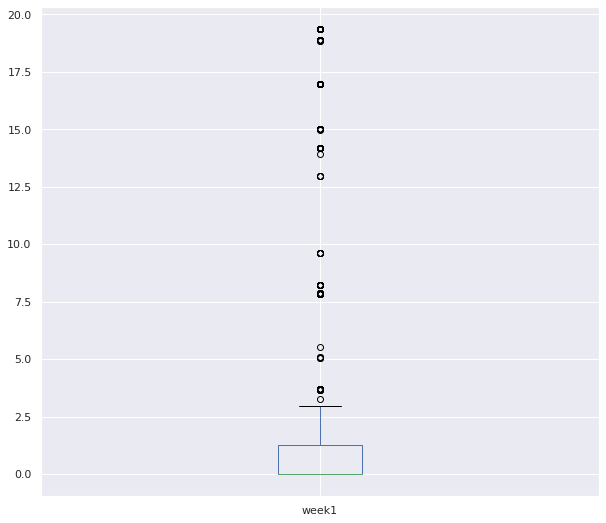

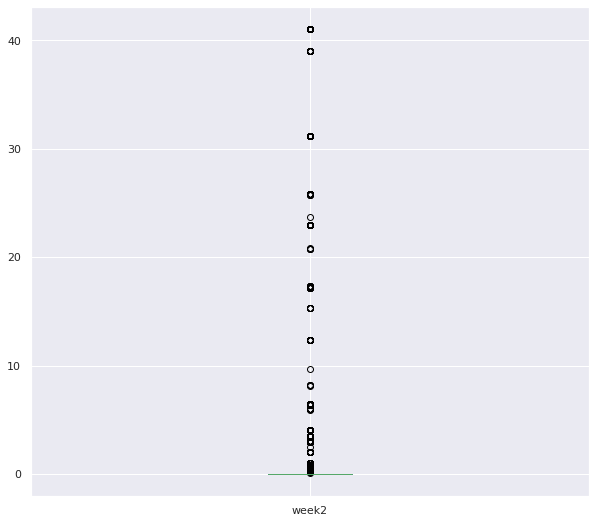

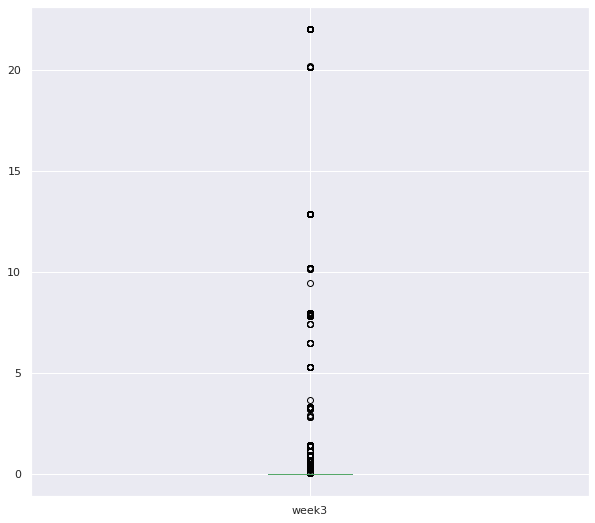

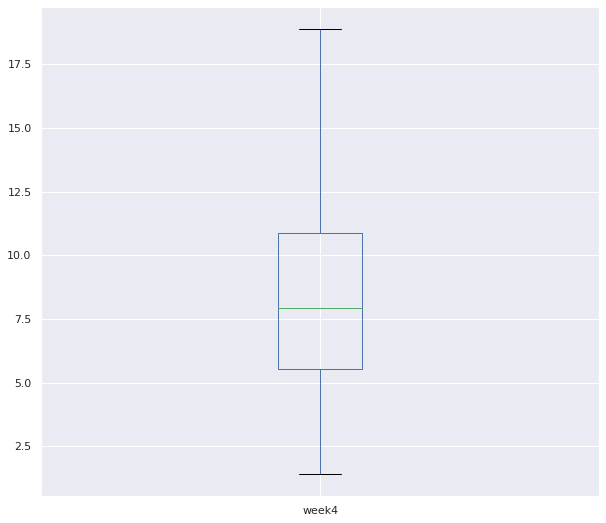

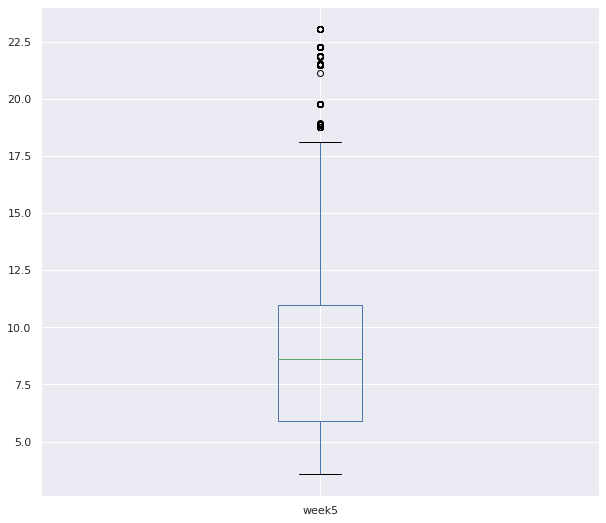

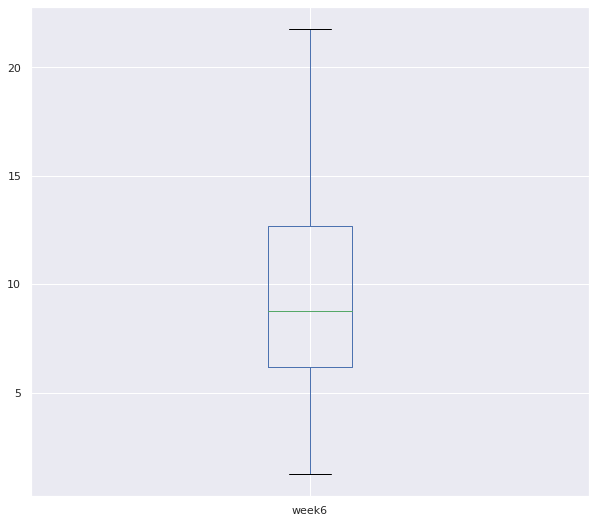

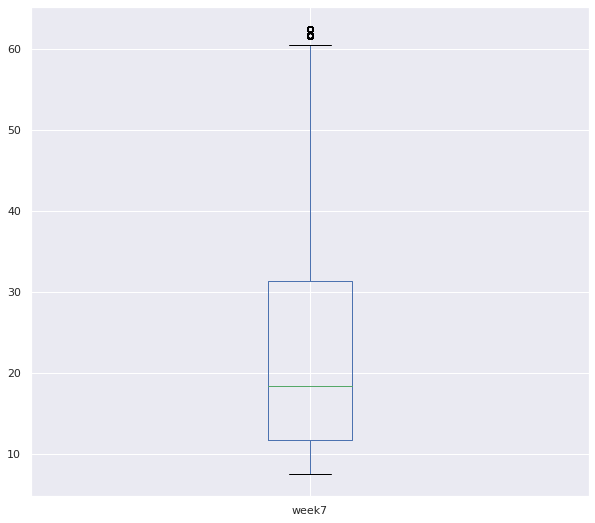

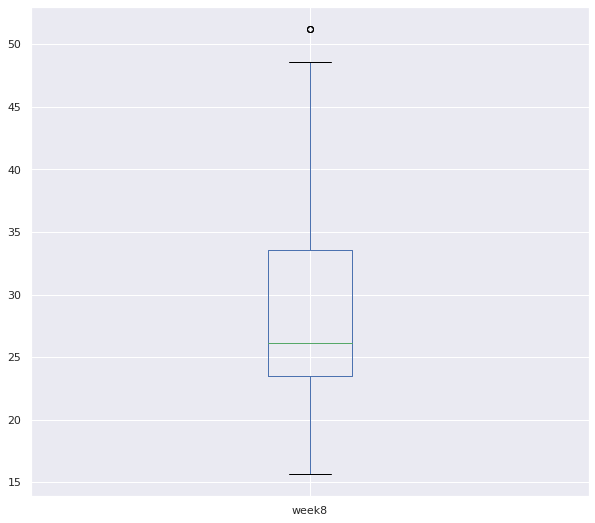

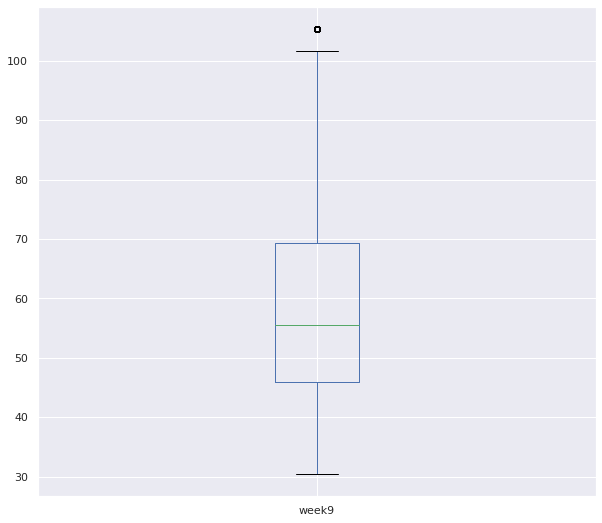

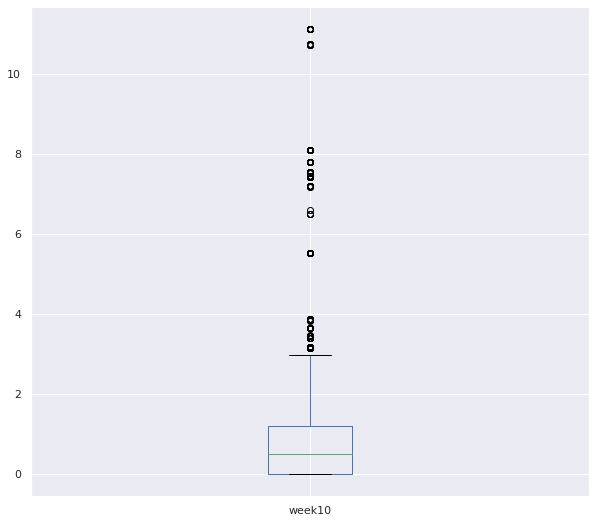

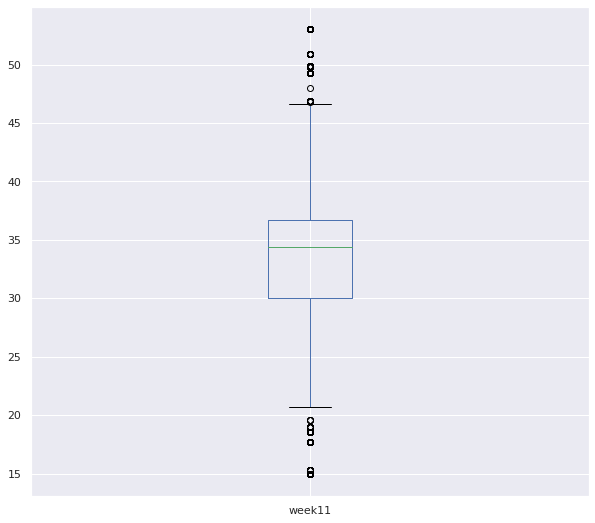

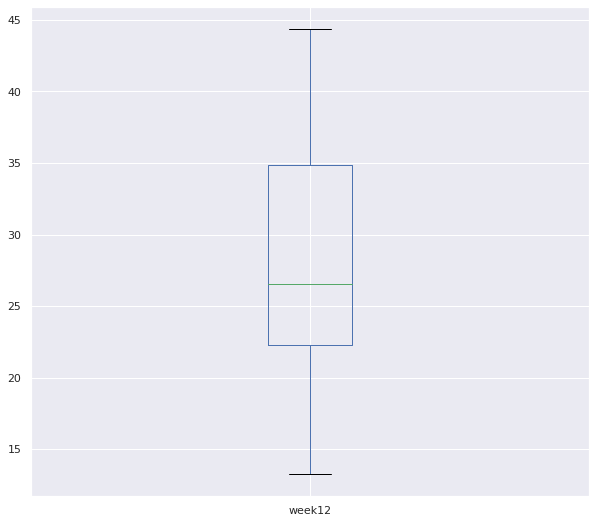

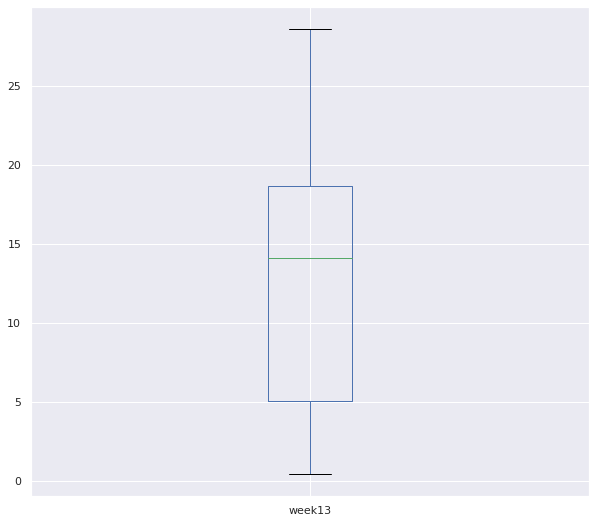

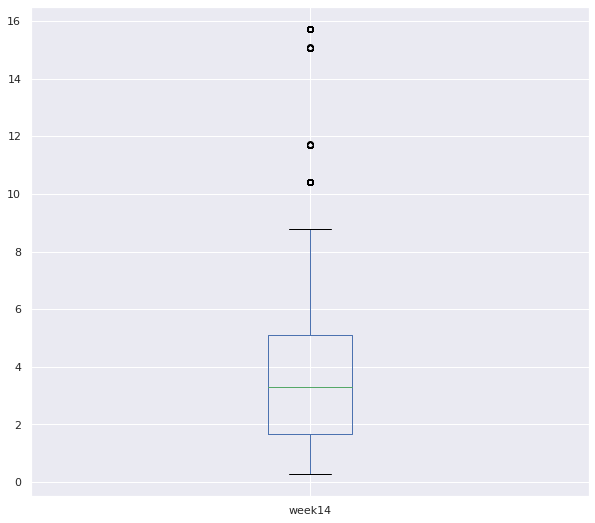

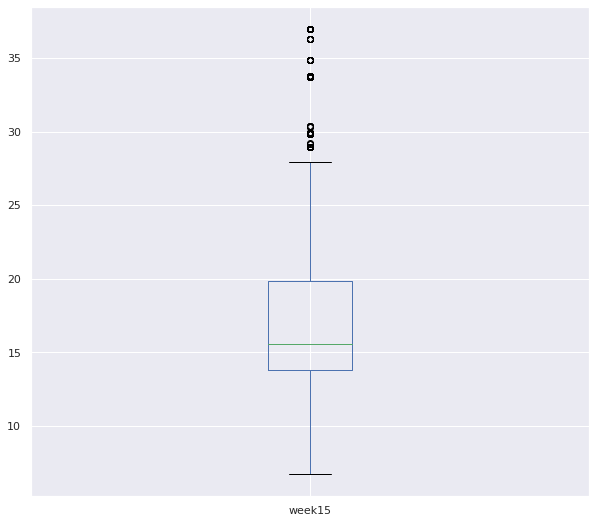

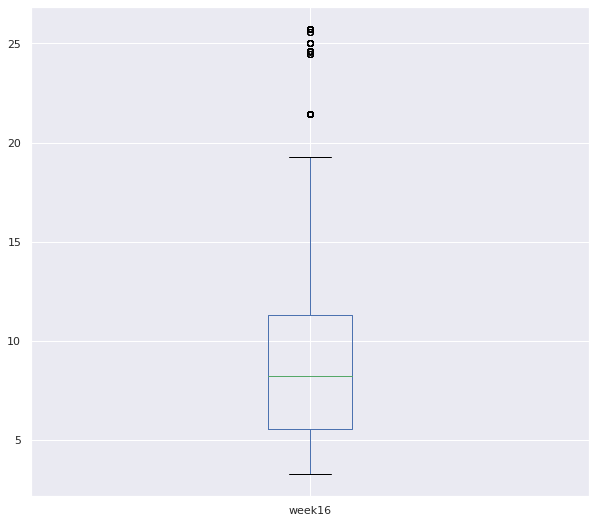

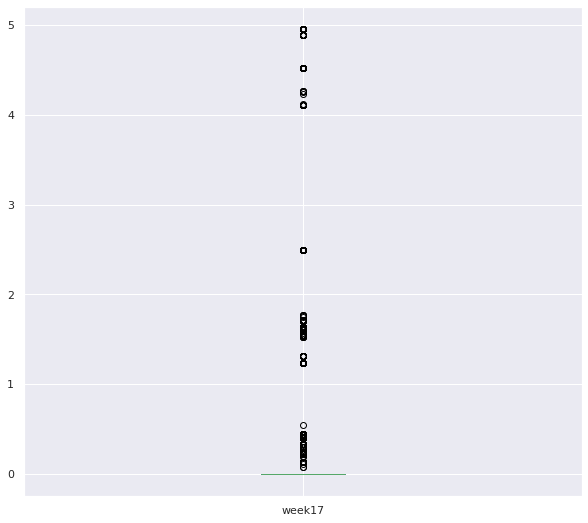

In [19]:
#drawing boxplots for the weekly collections
#we use our list ---- new
for col in new:
    plt.figure(figsize = (10, 9))
    train.boxplot(col)

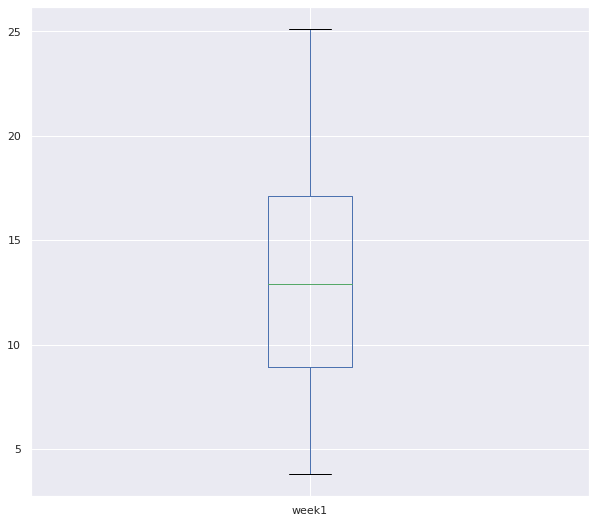

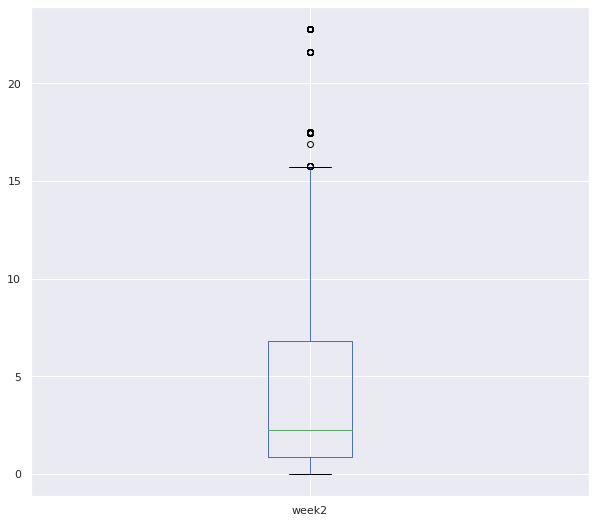

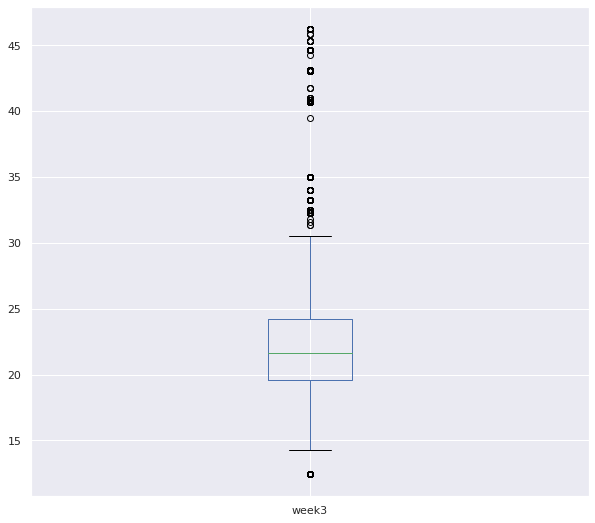

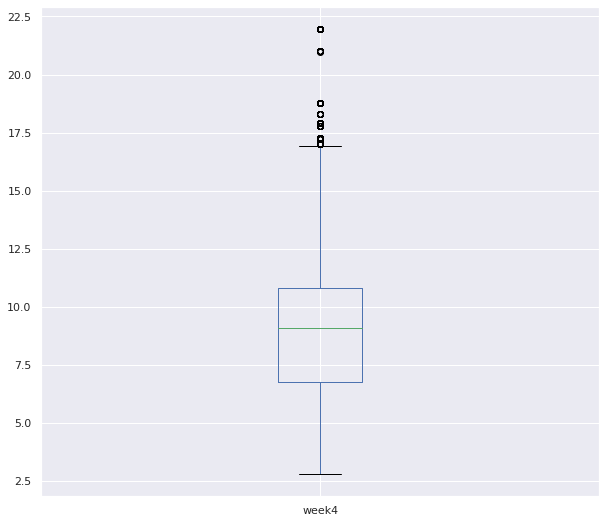

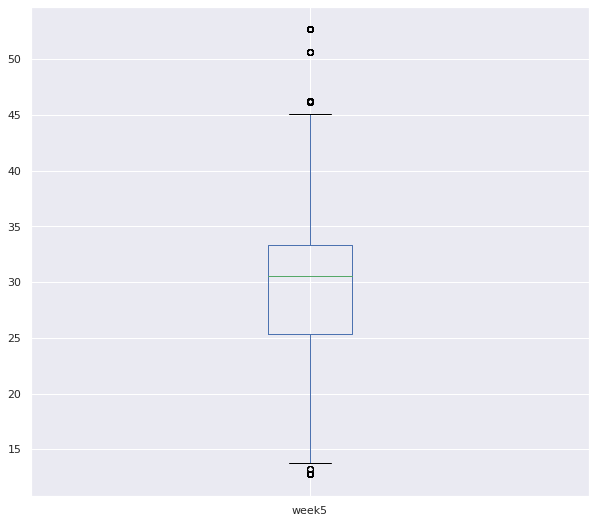

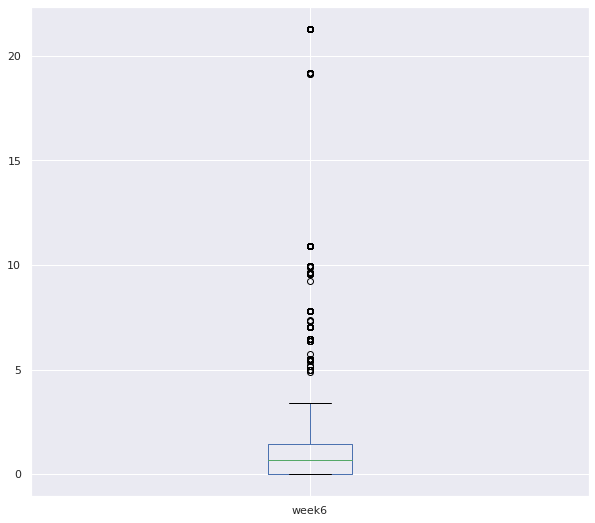

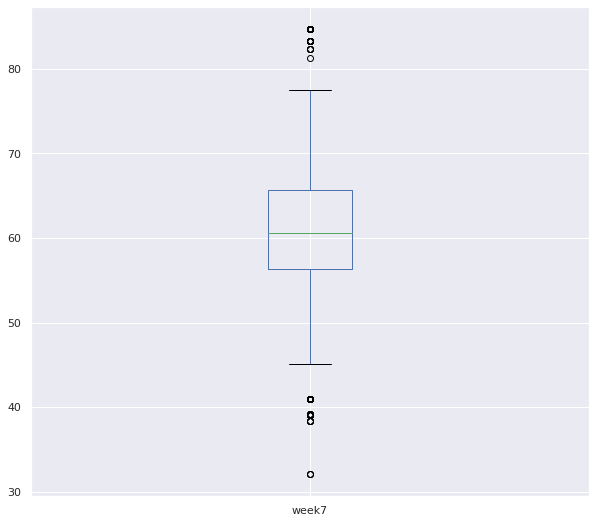

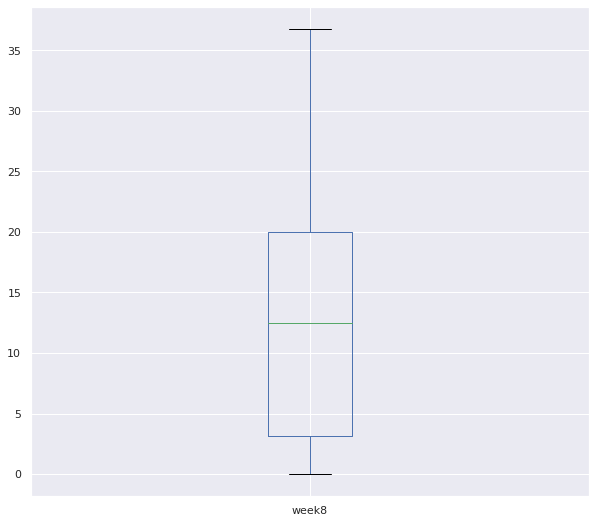

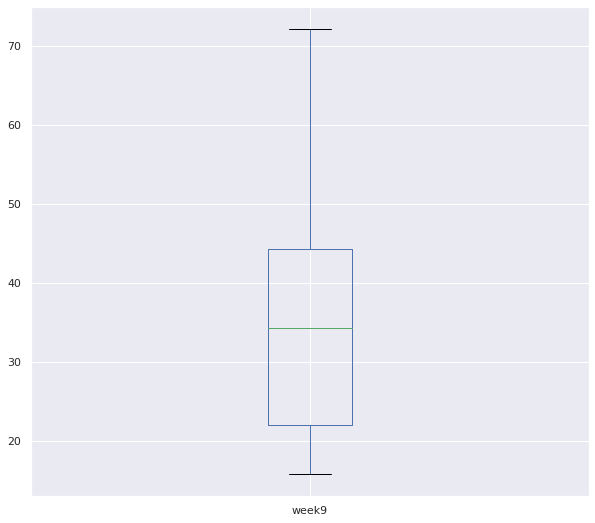

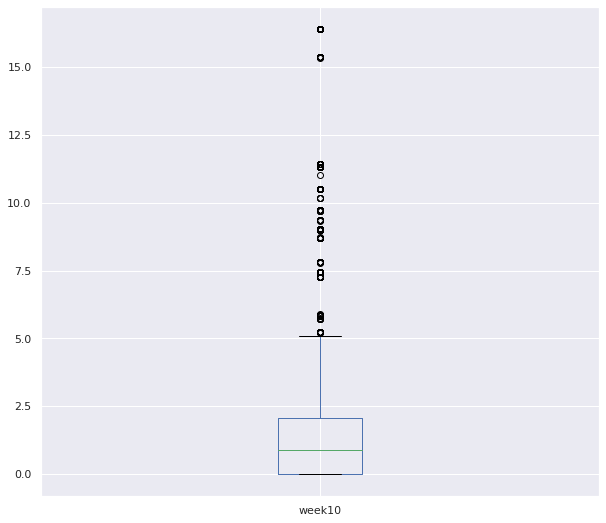

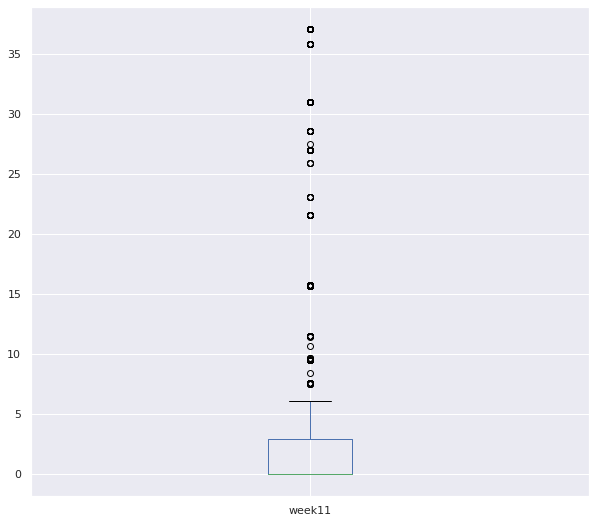

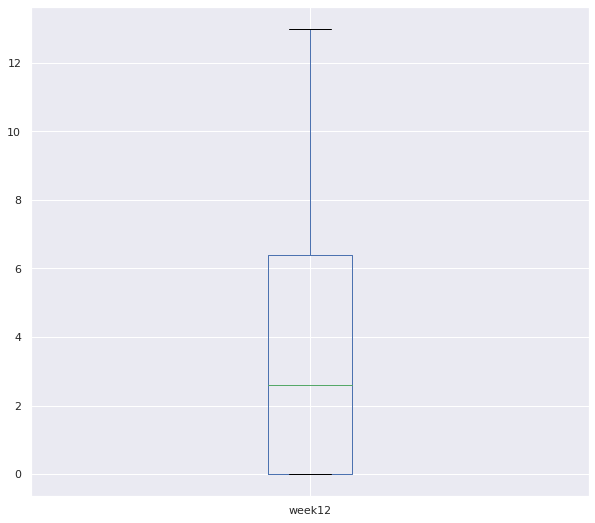

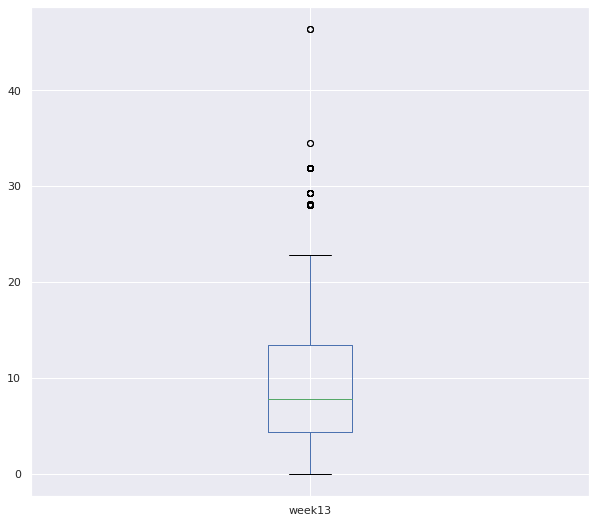

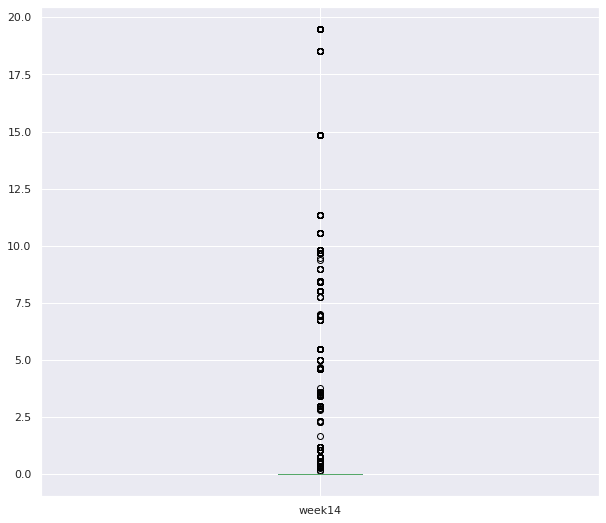

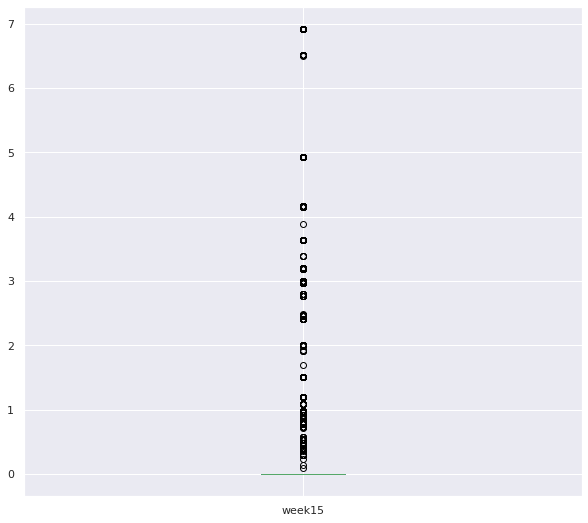

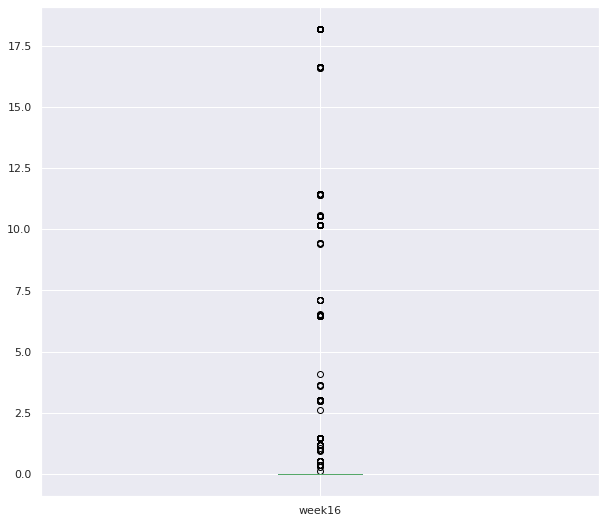

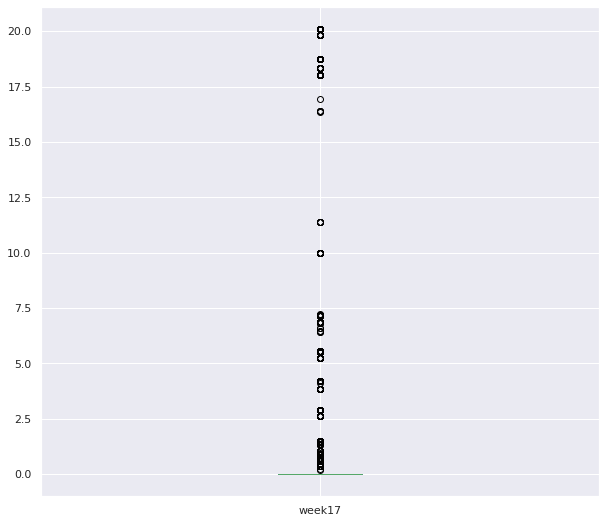

In [20]:
#drawing boxplots for the weekly collections
#we use our list ---- new
for col in new:
    plt.figure(figsize = (10, 9))
    test.boxplot(col)

In [21]:
#from the box ploots..
#the data has many outliers

In [22]:
# #ploting dist plots
# fig ,ax = plt.subplots(len(new) , figsize=(10,35))
# for i , col_df in enumerate(new):
#     sns.distplot(round(train[col_df] , 0) , ax[i] , hist = True)
#     ax[i].set_title('Freq . Dist . of '+col)
#     ax[i].set_xlabel(col)
    
# plt.title_layout()
# plt.show()

In [23]:
#fixing all outliers
#we will use quatiles to fix them and input those over 85 aand below 10%
def tryFixOutliers(data):
    for each_col in data.columns:
        data[each_col] = np.where(train[each_col]<data[each_col].quantile(0.5) ,data[each_col].mean() ,data[each_col])
        data[each_col] = np.where(train[each_col]>data[each_col].quantile(0.85) ,data.mean(axis =1) ,data[each_col])
    
tryFixOutliers(train)
tryFixOutliers(test)

In [24]:
#check skewness
for i , col in enumerate(new):
    print(col)
    print('Skew:  foor train '+ str(train[col].skew()) +' for test: '+str(test[col].skew()))
    print('Kurt: for train '+str(train[col].kurt())   +' for test: '+str(test[col].kurt()))

week1
Skew:  foor train 2.2787542281237934 for test: 3.6934010726596354
Kurt: for train 3.6135514313044483 for test: 14.49023812413454
week2
Skew:  foor train 2.1599177446369784 for test: 2.573208393400487
Kurt: for train 3.040616153236262 for test: 5.608953375665761
week3
Skew:  foor train 2.2099153868323977 for test: -5.062383221559507
Kurt: for train 3.2315877486849542 for test: 23.630594096041172
week4
Skew:  foor train 2.6930798068818267 for test: 1.985843687281047
Kurt: for train 7.9160076866460205 for test: 3.3154951362080833
week5
Skew:  foor train 1.5162951863882586 for test: 0
Kurt: for train 0.8735731152390427 for test: 0
week6
Skew:  foor train 1.5873739643996665 for test: 2.7641628314035462
Kurt: for train 3.565078350486262 for test: 8.40014729169058
week7
Skew:  foor train 0.6066551006175008 for test: 0
Kurt: for train 0.44320550887113397 for test: 0
week8
Skew:  foor train -1.3689675859239305 for test: 0.6832652360648529
Kurt: for train 1.249266388418203 for test: 3.0310

# Resulst
1 . For Kurtosis ---> The data has mixed distributioon of kurtosis
                      but for most data its is high
2 .  for Skewness  --->Most has positive skewness.

### from the observation , Due to high kurtosis .. It prooves that the data has outliers in it

In [25]:
# Check comparison of train with the target
# sns.PairGrid(train , y_vars = y , x_vars = 'week1' ).map(sns.regplot)

In [26]:
df_all = pd.concat([train , test] , axis = 0)
df_all['label'] = y

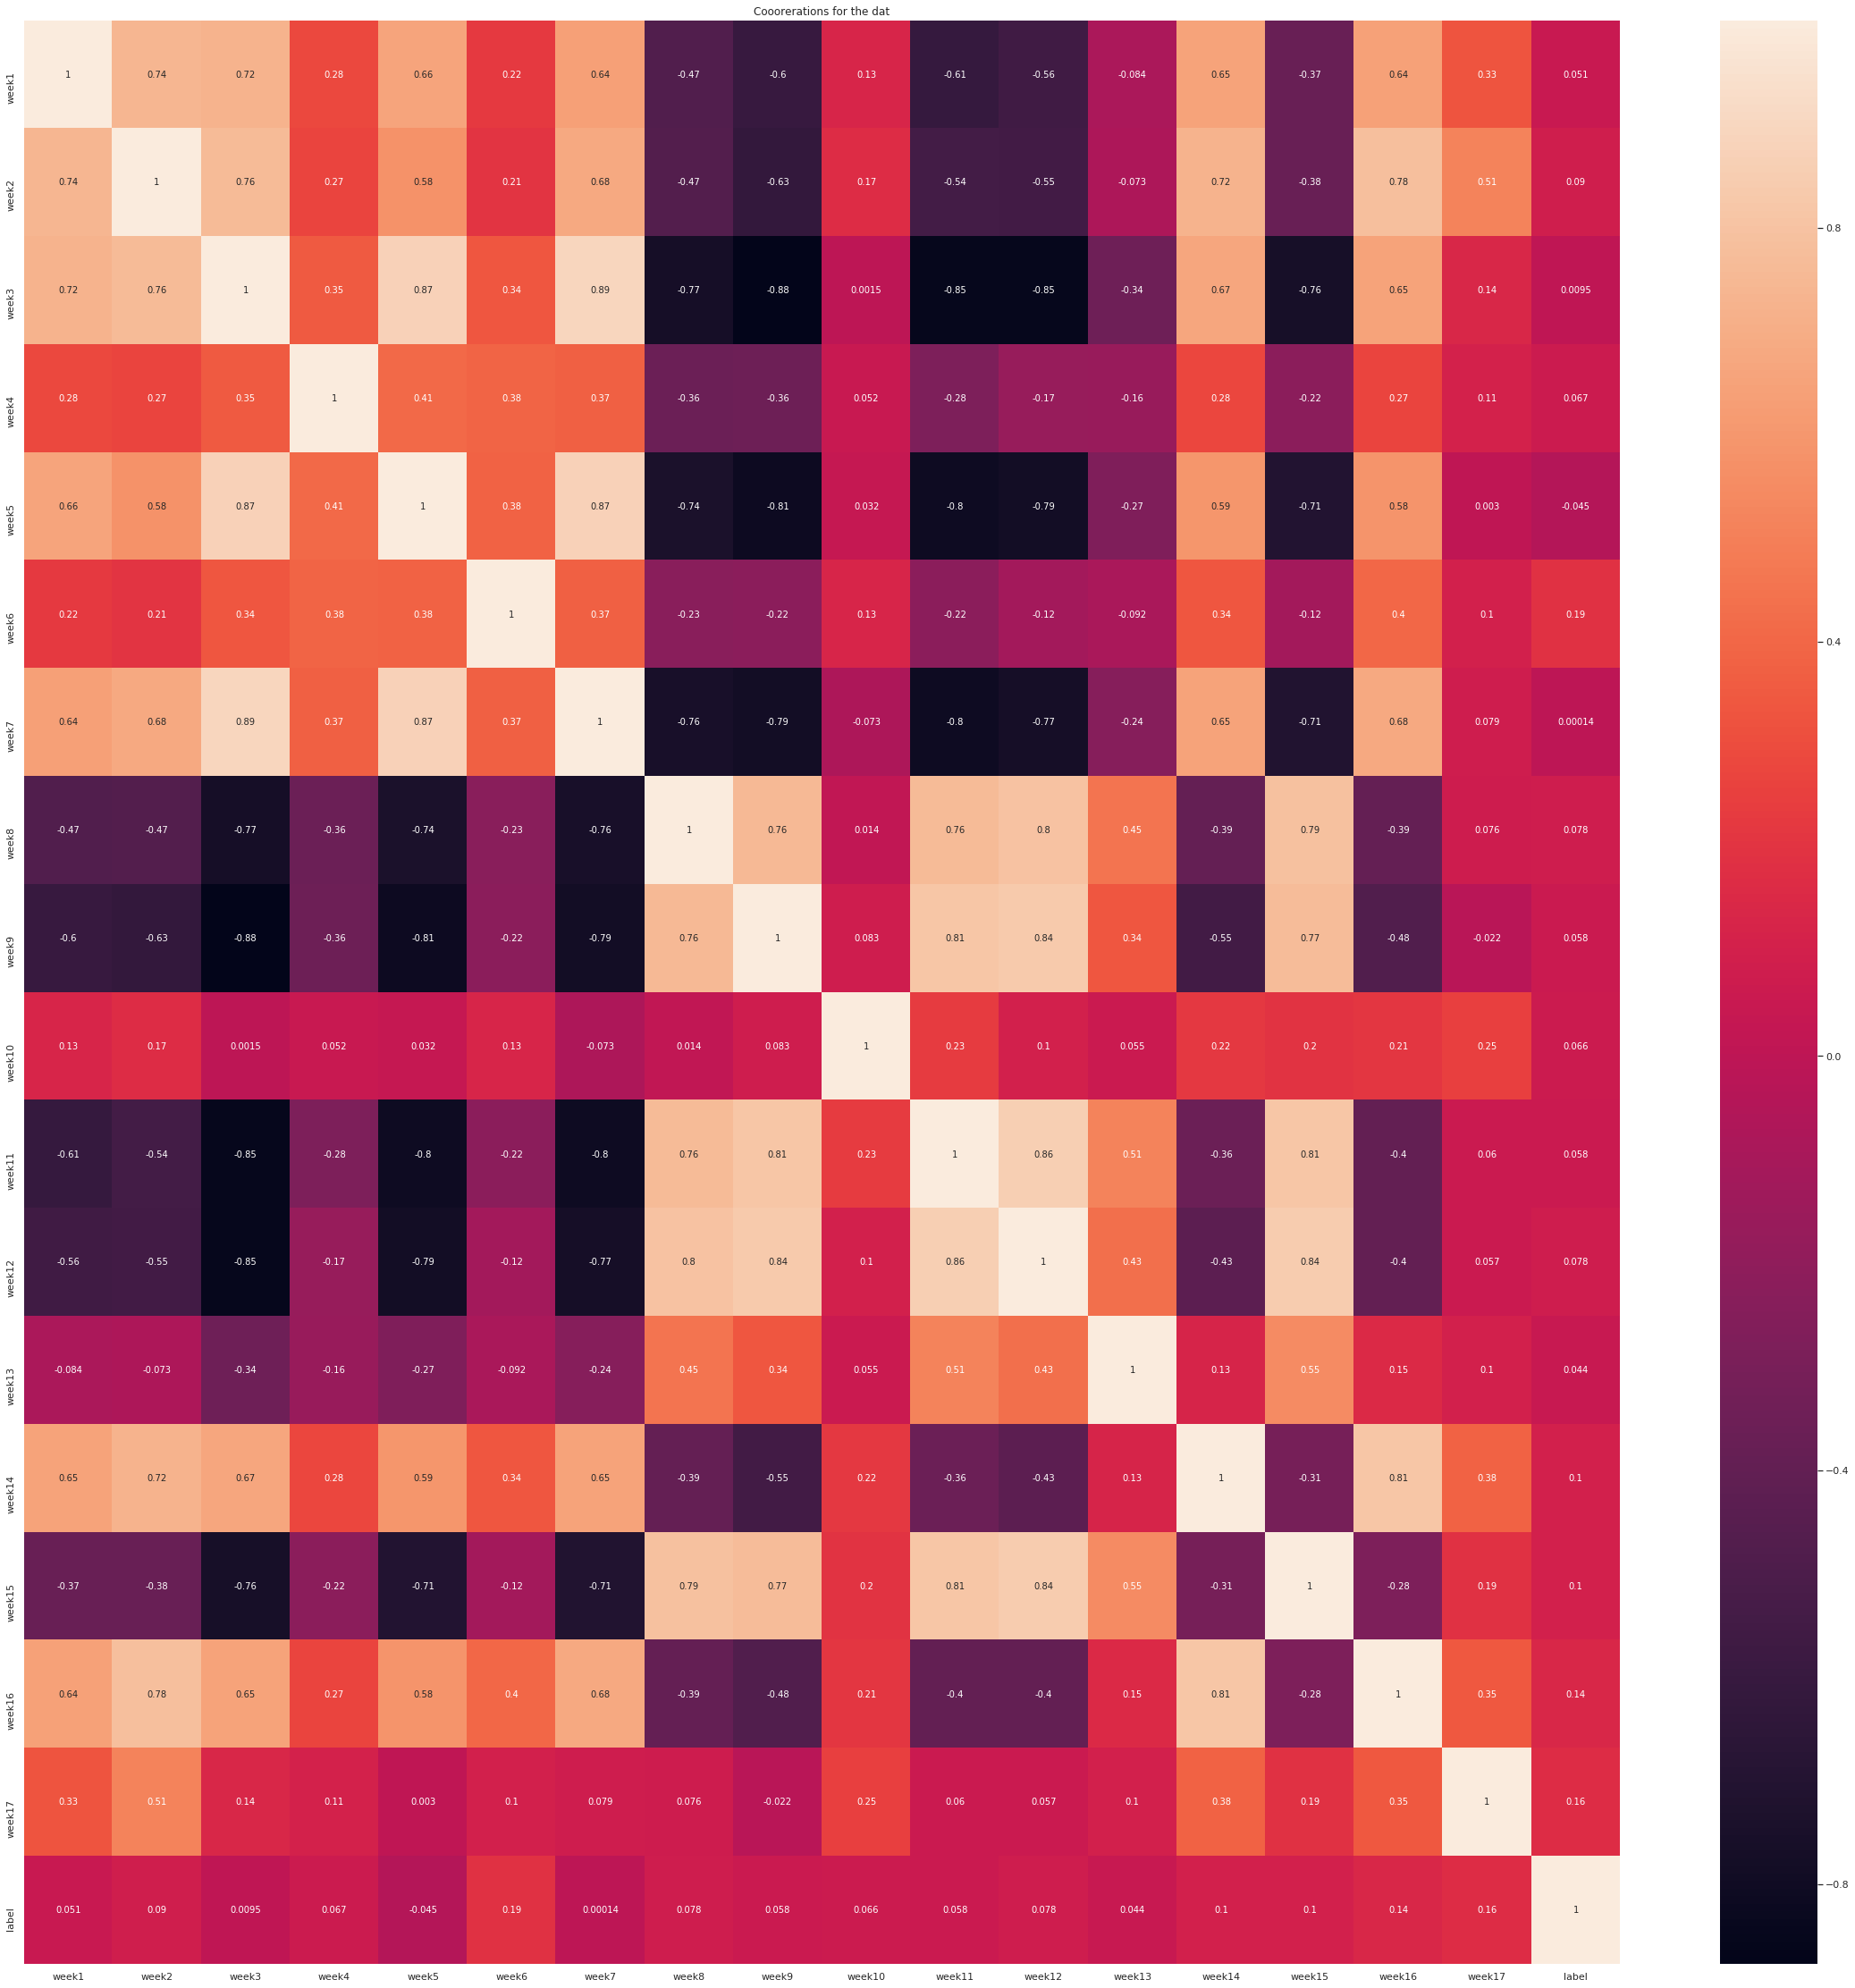

In [27]:
#correrations between the variables
plt.figure(figsize=(40,40))
corre = df_all.corr(method = 'spearman')
sns.heatmap(corre , xticklabels = corre.columns , yticklabels = corre.columns , annot =True)
plt.title('Cooorerations for the dat')
plt.show()

# label Has low correlations with out feartures

In [28]:
train.head()

,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week15,week16,week17
0,0.0,0.0,0.0,14.856471,14.857204,12.2378,14.87511,30.127,58.859214,1.5218,34.653174,32.8783,12.487909,3.802585,16.6591,9.110944,0.0
1,0.0,0.0,0.0,14.856471,14.857204,12.2378,14.87511,30.127,58.859214,1.5218,34.653174,32.8783,12.487909,3.802585,16.6591,9.110944,0.0
2,0.0,0.0,0.0,14.856471,14.857204,12.2378,14.87511,30.127,58.859214,1.5218,34.653174,32.8783,12.487909,3.802585,16.6591,9.110944,0.0
3,0.0,0.0,0.0,14.856471,14.857204,12.2378,14.87511,30.127,58.859214,1.5218,34.653174,32.8783,12.487909,3.802585,16.6591,9.110944,0.0
4,0.0,0.0,0.0,14.856471,14.857204,12.2378,14.87511,30.127,58.859214,1.5218,34.653174,32.8783,12.487909,3.802585,16.6591,9.110944,0.0


In [29]:
# #doing log transformation
# def logTrans(data):
#     for each_col in data.columns:
#         #replace zeros with mode
#         data[each_col] = np.where(data[each_col] > 0  , data[each_col] , data[each_col.mode()[0]])
#         data[each_col] = data[each_col].map(lambda x: np.log(x) if x > 0 else np.log(data[each_col].mode()))
        
# logTrans(train)
# logTras(test)

In [30]:
# #scaling using meanmax
# from sklearn.preprocessing import MinMaxScaler
# cols = test.columns
# scaler = MinMaxScaler()
# train = scaler.fit_transform(train)

# test = scaler.fit_transform(test)
# train = pd.DataFrame(train , columns = cols)
# test = pd.DataFrame(test , columns =cols )

In [31]:
#add other datas
#to test
test['X'] =df.X
test["Y"] = df.Y
test["elevation"] = df.elevation
test["LC_Type1_mode"] = df.LC_Type1_mode

#to train
train['X'] =df.X
train["Y"] = df.Y
train["elevation"] = df.elevation
train["LC_Type1_mode"] = df.LC_Type1_mode

In [32]:
#our target fearture as y
y = df.target_2015

In [33]:
# import category_encoders as ce
# ct = ce.CategoryEncoder()
# train['Xx'] = ct.fit_transform(train['X'])
# test['Xx'] = ct.fit_transform(test['X'])
# train['Yy'] = ct.fit_transform(train['Y'])
# test['Yy'] = ct.fit_transform(test['Y'])
# train['lc'] = ct.fit_transform(train['LC_Type1_mode'])
# test['lc'] = ct.fit_transform(test['LC_Type1_mode'])

In [34]:
#get total monthly data
def mon(data):
    data['m1'] = (data['week1']+data['week2']+data['week3']+data['week4'])
    data['m2'] = (data['week5']+data['week6']+data['week7']+data['week8'])
    data['m3'] = (data['week9']+data['week10']+data['week11']+data['week12'])
    data['m4'] = (data['week13']+data['week14']+data['week15']+data['week16'])
#     data['m5'] =(data['week17']+df.m4+) 
    
mon(train)
mon(test)

In [35]:
#we will get the area and volume of each square now...
#we know that 1 degree = 111km on earth surface 
#so for o.o1 is 1.11km
# area = 1.1km*1.1km for each slope
# volume = area * elevation
#slope = y1-y2/x1-x2
#lets do the above
 #add diagonal x and y
def add_diag(data):
#     diagonal x , y
    data['D1X'] = data['X'] + 0.02
    data['D1Y'] = data['Y'] - 0.02
    data['D2X'] = data['X'] + 0.02
    data['D2Y'] = data['Y'] - 0.02
#     vertical x ,y
add_diag(df)
def add_dim(data ,x):
    #this is amout of precipitate the area can hold
    data['volume'] = np.arctan(x['elevation']*1.1*1.1)
    data['slope_hor'] = ((x['D1Y']-x['D2Y']) + (x['D1X']-x['D2X']))
add_dim(train , df)
add_dim(test , df)

In [36]:
#average precipit for whole data
test['avg_precip']=test[new].mean(axis = 1)
train['avg_precip']=train[new].mean(axis = 1)

In [37]:
# # add a column for summint monthly data
train['sum'] = train[new].sum(axis =1)
test['sum'] = test[new].sum(axis = 1)

In [38]:
# #lets try to check if a flood really occured in our train
# # We will then predict for the test dat
# # tbin = [0 ,0.5 , 1]
# # tlabel = [0,1]
# # train['isflood'] = pd.cut(y , labels = tlabel , bins = tbin).cat.codes
# train['isflood'] = np.where(y>0.5 , 1 , 0)
# from sklearn.ensemble import RandomForestClassifier
# cl = RandomForestClassifier()
# x = train.drop(['isflood'] , axis= 1)
# y = train.isflood
# x_train , x_test , y_t , y_te = train_test_split(x , y , test_size = 0.3 , random_state = 0)
# cl.fit(x_train , y_t)
# p = cl.predict(x_test)
# from sklearn.metrics import accuracy_score
# print(f"score is {accuracy_score(y_te , p)}")
# test['isflood'] = cl.predict(test)

## with this out model overfits

# modeling

In [39]:
#lets check the algo with best results
# Using different models to find the optimal model
#
import sys
sys.path.append('/usr/local/lib/python3.7/dist-packages')
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')


# Creating a list of regressor algorithms to compare with
#
models = [RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(),  XGBRegressor(objective ='reg:squarederror'),\
          SVR(), KNeighborsRegressor(), LinearRegression() , CatBoostRegressor(logging_level='Silent') ,LGBMRegressor()]


# Creating lists of the algorithms, to store the accuracy scores of each fold
#
RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVR, KNeighbors, Linear  ,cat,light= ([] for x in range(10))


# Creating a list containig the list of each algorithm. Created for easy iteration
#
model_list = [RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVR, KNeighbors, Linear , cat , light]


# Spliting the data into features and the target variable
#
X = train
# y = target


# Creating a cross validation of 10 folds
#
kfold  = KFold(n_splits=10, random_state=101)


# Iterating through each model and appending the scores of each fold to the appriopriate list
#
for i, j in zip(models, model_list):
  j.extend(list(cross_val_score(i, X, y, scoring = 'neg_mean_squared_error', cv = kfold)))

  
# Creating a function to convert neg_mean_squared_error to a square root
#
def sq(lis):
  new_lis = []
  lis = np.array(lis)
  for i in lis:
    i = np.sqrt(i*-1)
    new_lis.append(i)
  return new_lis


# Creating a dataframe of all the rmses from the iterations for each model
#
rmses = pd.DataFrame({'Fold': np.arange(1, 11), 'RandomForest': sq(RandomForest), 'GradientBoosting': sq(GradientBoosting), 'Adaboost': sq(AdaBoost), 'DecisionTree': sq(DecisionTree),\
                       'XGB': sq(XGB), 'SVR': sq(SVR), 'Kneighbors': sq(KNeighbors), 'Linear': sq(Linear) , 'cat':sq(cat) , 'light':sq(light)})

# Setting the index
#
rmses.set_index('Fold', inplace = True)


# Calculating the mean and standard deviation rmse of each algorithm
#
rmses.loc['mean'] = rmses.mean()
rmses.loc['std'] = rmses.std()


# Previewing the rmses dataframe
#
rmses

,RandomForest,GradientBoosting,Adaboost,DecisionTree,XGB,SVR,Kneighbors,Linear,cat,light
Fold,,,,,,,,,,
1,0.108557,0.084934,0.085441,0.215514,0.097001,0.129665,0.083795,0.122830,0.086440,0.087967
2,0.067850,0.058668,0.079683,0.100107,0.068956,0.109268,0.065576,0.063399,0.064280,0.059072
3,0.112370,0.088028,0.107817,0.167916,0.101366,0.127620,0.094582,0.144504,0.103337,0.093752
4,0.177024,0.168129,0.233258,0.213810,0.171767,0.197456,0.190240,0.202764,0.156744,0.154507
5,0.180062,0.175814,0.220371,0.217788,0.168669,0.192506,0.176838,0.236613,0.154432,0.165358
6,0.109283,0.119167,0.173451,0.136719,0.108216,0.145761,0.110020,0.149128,0.107790,0.112247
7,0.078279,0.071889,0.114582,0.066624,0.053707,0.112317,0.058996,0.077515,0.051696,0.068260
8,0.156970,0.111570,0.141526,0.188104,0.135884,0.192155,0.184506,0.118648,0.145460,0.141109
9,0.255281,0.268646,0.280562,0.286414,0.275959,0.275186,0.346908,0.347205,0.270444,0.263303


In [40]:
import sys
sys.path.append('/usr/local/lib/python3.7/dist-packages')
X = train
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# model = XGBRegressor()
X_train,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.15 ,  random_state = 1)
model =  LGBMRegressor(feature_fraction = 0.98 , bagging_fraction = 0.88 ,verbose= 100, colsample_bytree = 0.1, n_estimators=180,
               class_weight=None,
               learning_rate=0.2, max_depth=0,                      
               min_child_samples=1,
               min_child_weight=1.79, min_split_gain=0.0, 
               n_jobs=-1, num_leaves=70, objective=None, 
               random_state=None, reg_alpha=0.01, reg_lambda=0.0, 
               silent=True, 
               subsample_for_bin=2000, subsample_freq=2)      
model.fit(X_train,y_train)
pre = model.predict(X_test)
from sklearn.metrics import mean_squared_error as mse
print('mse is '+str(mse(y_test , pre)))
print('rmse is '+str(np.sqrt(mse(y_test , pre))))

mse is 0.006465362996019713
rmse is 0.08040748097049001


In [44]:
X_train,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.8)  
# model2 = XGBRegressor()
model2 = CatBoostRegressor()
model2.fit(X_train,y_train)
pre_cat = model2.predict(X_test)
from sklearn.metrics import mean_squared_error as mse
print('mse is '+str(mse(y_test , pre_cat)))
print('rmse is '+str(np.sqrt(mse(y_test , pre_cat))))

Learning rate set to 0.048254
0:	learn: 0.2195448	total: 9.91ms	remaining: 9.9s
1:	learn: 0.2145707	total: 16.7ms	remaining: 8.35s
2:	learn: 0.2105128	total: 23.5ms	remaining: 7.8s
3:	learn: 0.2057212	total: 30ms	remaining: 7.47s
4:	learn: 0.2019407	total: 36.7ms	remaining: 7.3s
5:	learn: 0.1976952	total: 43.7ms	remaining: 7.23s
6:	learn: 0.1949396	total: 50.8ms	remaining: 7.2s
7:	learn: 0.1915302	total: 57.5ms	remaining: 7.13s
8:	learn: 0.1883874	total: 63.7ms	remaining: 7.02s
9:	learn: 0.1858637	total: 70.5ms	remaining: 6.98s
10:	learn: 0.1834366	total: 77.2ms	remaining: 6.94s
11:	learn: 0.1815534	total: 83.8ms	remaining: 6.9s
12:	learn: 0.1791809	total: 90ms	remaining: 6.83s
13:	learn: 0.1765952	total: 96.3ms	remaining: 6.78s
14:	learn: 0.1744845	total: 103ms	remaining: 6.75s
15:	learn: 0.1722708	total: 124ms	remaining: 7.63s
16:	learn: 0.1704860	total: 131ms	remaining: 7.56s
17:	learn: 0.1684350	total: 138ms	remaining: 7.51s
18:	learn: 0.1669570	total: 142ms	remaining: 7.35s
19:	le

165:	learn: 0.1140798	total: 1.18s	remaining: 5.92s
166:	learn: 0.1139908	total: 1.19s	remaining: 5.91s
167:	learn: 0.1138653	total: 1.19s	remaining: 5.92s
168:	learn: 0.1137254	total: 1.2s	remaining: 5.92s
169:	learn: 0.1135628	total: 1.21s	remaining: 5.91s
170:	learn: 0.1133396	total: 1.22s	remaining: 5.93s
171:	learn: 0.1131332	total: 1.23s	remaining: 5.92s
172:	learn: 0.1129207	total: 1.24s	remaining: 5.93s
173:	learn: 0.1127674	total: 1.25s	remaining: 5.93s
174:	learn: 0.1126064	total: 1.26s	remaining: 5.93s
175:	learn: 0.1124363	total: 1.27s	remaining: 5.94s
176:	learn: 0.1123866	total: 1.28s	remaining: 5.95s
177:	learn: 0.1122183	total: 1.29s	remaining: 5.94s
178:	learn: 0.1121759	total: 1.29s	remaining: 5.92s
179:	learn: 0.1120241	total: 1.3s	remaining: 5.93s
180:	learn: 0.1118933	total: 1.31s	remaining: 5.91s
181:	learn: 0.1118413	total: 1.31s	remaining: 5.91s
182:	learn: 0.1117108	total: 1.32s	remaining: 5.9s
183:	learn: 0.1115388	total: 1.33s	remaining: 5.89s
184:	learn: 0.1

327:	learn: 0.0980068	total: 2.37s	remaining: 4.85s
328:	learn: 0.0978538	total: 2.38s	remaining: 4.85s
329:	learn: 0.0978090	total: 2.39s	remaining: 4.84s
330:	learn: 0.0977337	total: 2.4s	remaining: 4.84s
331:	learn: 0.0976712	total: 2.4s	remaining: 4.84s
332:	learn: 0.0976559	total: 2.41s	remaining: 4.83s
333:	learn: 0.0975892	total: 2.43s	remaining: 4.85s
334:	learn: 0.0975281	total: 2.44s	remaining: 4.84s
335:	learn: 0.0973877	total: 2.45s	remaining: 4.84s
336:	learn: 0.0973514	total: 2.45s	remaining: 4.83s
337:	learn: 0.0972890	total: 2.46s	remaining: 4.82s
338:	learn: 0.0972507	total: 2.47s	remaining: 4.81s
339:	learn: 0.0972239	total: 2.47s	remaining: 4.8s
340:	learn: 0.0970736	total: 2.48s	remaining: 4.79s
341:	learn: 0.0969253	total: 2.48s	remaining: 4.78s
342:	learn: 0.0967946	total: 2.5s	remaining: 4.78s
343:	learn: 0.0967376	total: 2.5s	remaining: 4.77s
344:	learn: 0.0967115	total: 2.51s	remaining: 4.76s
345:	learn: 0.0966804	total: 2.51s	remaining: 4.75s
346:	learn: 0.096

492:	learn: 0.0874940	total: 3.56s	remaining: 3.66s
493:	learn: 0.0874216	total: 3.57s	remaining: 3.66s
494:	learn: 0.0873629	total: 3.58s	remaining: 3.66s
495:	learn: 0.0873248	total: 3.59s	remaining: 3.65s
496:	learn: 0.0872440	total: 3.6s	remaining: 3.64s
497:	learn: 0.0872206	total: 3.61s	remaining: 3.64s
498:	learn: 0.0871570	total: 3.62s	remaining: 3.63s
499:	learn: 0.0871198	total: 3.62s	remaining: 3.62s
500:	learn: 0.0870230	total: 3.63s	remaining: 3.62s
501:	learn: 0.0869998	total: 3.64s	remaining: 3.61s
502:	learn: 0.0869404	total: 3.65s	remaining: 3.6s
503:	learn: 0.0869048	total: 3.65s	remaining: 3.6s
504:	learn: 0.0868481	total: 3.66s	remaining: 3.59s
505:	learn: 0.0867722	total: 3.67s	remaining: 3.58s
506:	learn: 0.0867293	total: 3.67s	remaining: 3.57s
507:	learn: 0.0866784	total: 3.68s	remaining: 3.56s
508:	learn: 0.0866444	total: 3.68s	remaining: 3.55s
509:	learn: 0.0866216	total: 3.69s	remaining: 3.54s
510:	learn: 0.0865326	total: 3.69s	remaining: 3.54s
511:	learn: 0.0

667:	learn: 0.0794655	total: 4.74s	remaining: 2.36s
668:	learn: 0.0794348	total: 4.75s	remaining: 2.35s
669:	learn: 0.0793920	total: 4.76s	remaining: 2.35s
670:	learn: 0.0793766	total: 4.77s	remaining: 2.34s
671:	learn: 0.0793332	total: 4.78s	remaining: 2.33s
672:	learn: 0.0793194	total: 4.78s	remaining: 2.32s
673:	learn: 0.0793163	total: 4.79s	remaining: 2.32s
674:	learn: 0.0792927	total: 4.8s	remaining: 2.31s
675:	learn: 0.0792112	total: 4.81s	remaining: 2.3s
676:	learn: 0.0791241	total: 4.82s	remaining: 2.3s
677:	learn: 0.0790775	total: 4.82s	remaining: 2.29s
678:	learn: 0.0790363	total: 4.83s	remaining: 2.28s
679:	learn: 0.0790181	total: 4.83s	remaining: 2.27s
680:	learn: 0.0789872	total: 4.84s	remaining: 2.27s
681:	learn: 0.0789740	total: 4.84s	remaining: 2.26s
682:	learn: 0.0789712	total: 4.85s	remaining: 2.25s
683:	learn: 0.0789586	total: 4.86s	remaining: 2.24s
684:	learn: 0.0789438	total: 4.86s	remaining: 2.24s
685:	learn: 0.0788640	total: 4.87s	remaining: 2.23s
686:	learn: 0.0

852:	learn: 0.0727325	total: 6.13s	remaining: 1.06s
853:	learn: 0.0727267	total: 6.14s	remaining: 1.05s
854:	learn: 0.0727060	total: 6.15s	remaining: 1.04s
855:	learn: 0.0726892	total: 6.16s	remaining: 1.04s
856:	learn: 0.0726717	total: 6.17s	remaining: 1.03s
857:	learn: 0.0726383	total: 6.18s	remaining: 1.02s
858:	learn: 0.0726105	total: 6.19s	remaining: 1.01s
859:	learn: 0.0725761	total: 6.19s	remaining: 1.01s
860:	learn: 0.0725536	total: 6.2s	remaining: 1s
861:	learn: 0.0725179	total: 6.21s	remaining: 994ms
862:	learn: 0.0724696	total: 6.21s	remaining: 987ms
863:	learn: 0.0724402	total: 6.22s	remaining: 979ms
864:	learn: 0.0724231	total: 6.23s	remaining: 972ms
865:	learn: 0.0723866	total: 6.23s	remaining: 964ms
866:	learn: 0.0723686	total: 6.24s	remaining: 957ms
867:	learn: 0.0723266	total: 6.24s	remaining: 949ms
868:	learn: 0.0722904	total: 6.25s	remaining: 942ms
869:	learn: 0.0722674	total: 6.26s	remaining: 935ms
870:	learn: 0.0722556	total: 6.26s	remaining: 927ms
871:	learn: 0.07

# LGBMRegressor performed better with o.08
# It gave me 0.83... on the lb 
# position 46/485

In [ ]:
predictions  = model.predict(test)  # Making predictions
submission_df = pd.DataFrame({'Square_ID': id, 'target_2019': predictions}) # Creating a submission file
submission_df.to_csv('model1.csv', index = False)